In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [11]:
def clean_rooms(x):
    return x[-1:]

In [12]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected':'0','Meal Plan 1':'1','Meal Plan 2':'2','Meal Plan 3':'3'})
df['room_type_reserved'] = df['room_type_reserved'].apply(lambda row: clean_rooms(row))
df['market_segment_type'] = df['market_segment_type'].map({'Offline':'0','Online':'1','Corporate':'2','Aviation':'3','Complementary':'4'})
df['booking_status'] = df['booking_status'].map({'Not_Canceled':'0','Canceled':'1'})

In [13]:
def clean_rooms(x):
    return x[-1:]

In [14]:
df['market_segment_type'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [15]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.50,0,1


In [16]:
colname = df.columns

In [17]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [18]:
X = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]
y = df['booking_status']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Feature: no_of_children n.2, Score: 0.23649
Feature: no_of_week_nights n.4, Score: -0.38043
Feature: arrival_date n.11, Score: 0.54261
Feature: avg_price_per_room n.16, Score: -1.33917


C:\Users\oludo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


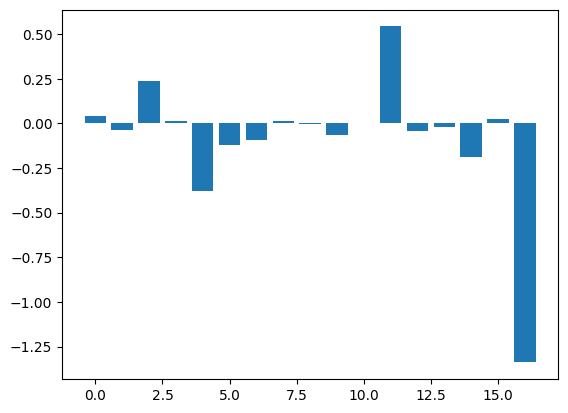

In [20]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    if importance[i] > 0.2 or importance[i] < -0.2:
        print('Feature: '+str(colname[i])+' n.%0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
df = df[['no_of_children','no_of_week_nights','arrival_date','avg_price_per_room','booking_status']]
X = df[['no_of_children','no_of_week_nights','arrival_date','avg_price_per_room']]

In [22]:
df = df.astype(dtype='float')

In [23]:
df

,no_of_children,no_of_week_nights,arrival_date,avg_price_per_room,booking_status
0,0.0,2.0,2.0,65.00,0.0
1,0.0,3.0,6.0,106.68,0.0
2,0.0,1.0,28.0,60.00,1.0
3,0.0,2.0,20.0,100.00,1.0
4,0.0,1.0,11.0,94.50,1.0
...,...,...,...,...,...
36270,0.0,6.0,3.0,167.80,0.0
36271,0.0,3.0,17.0,90.95,1.0
36272,0.0,6.0,1.0,98.39,0.0
36273,0.0,3.0,21.0,94.50,1.0


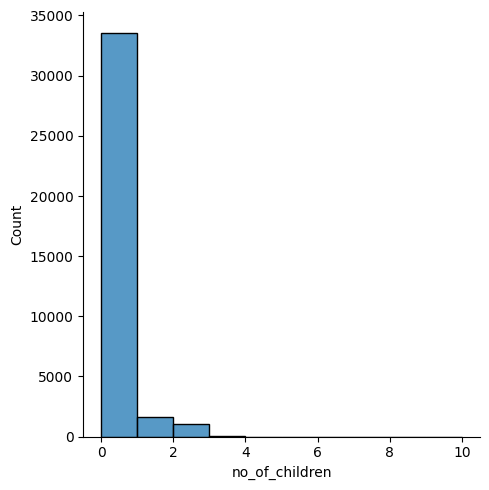

In [25]:
sns.displot(df['no_of_children'], binwidth=1)

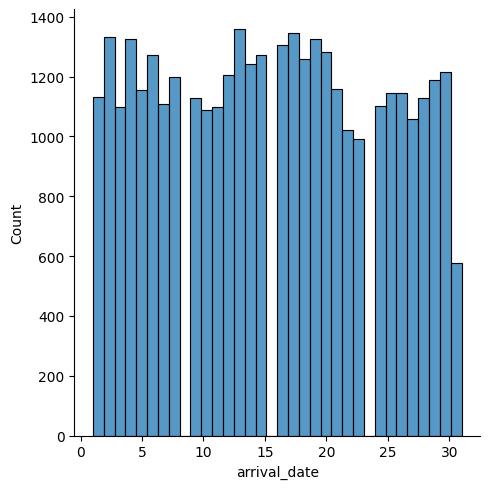

In [26]:
sns.displot(df['arrival_date'])

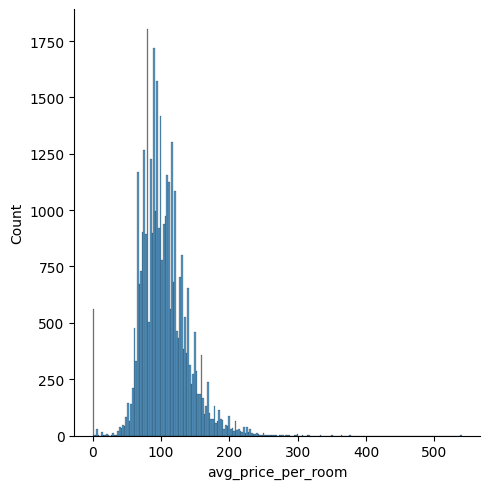

In [27]:
sns.displot(df['avg_price_per_room'])

In [29]:
df = df[df['avg_price_per_room'] > 0]

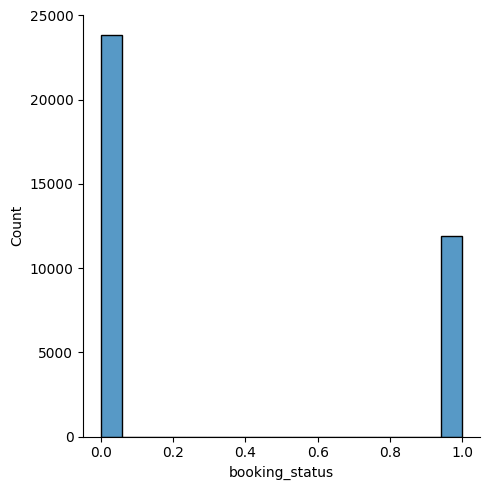

In [31]:
sns.displot(df['booking_status'])

In [32]:
df.to_csv('selected_features.csv',index=False)